## HomeWork 1 Due at Mid-night 9/16/2019

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [1]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

Failed in import pandasql


**Import all standard libaries**

In [2]:
import pandas as pd
import pandasql as ps
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading MPG dataset ##

In [3]:
mpg = pd.read_csv("mpg2.csv")
print(mpg.shape)
mpg.head()

(400, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Question 1. Check if there are any null or NA

In [11]:
# Check for null values
mpg[mpg.isnull().any(1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
33,NaN,4,113.0,95.0,2228,14.0,71,japan,toyota corona
34,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
128,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
332,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
338,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
356,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
376,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


## Question 2. Remove any rows that has null or NA

In [5]:
# Drop null values
mpg = mpg.dropna()

## Question 3. Check if there is any outliers in the mpg field

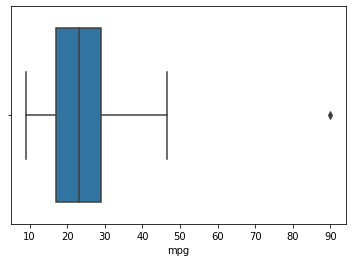

In [6]:
# Output
sns.boxplot(x=mpg['mpg'])

## Question 4. Display and then Remove the one outlier row. You should now have 392 rows

In [7]:
# Output
mpg[mpg['mpg'] >= 50]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
9,90.0,8,451.0,450.0,2555,8.0,2020,usa,tesla model Y


In [8]:
# Get index of outlier
outlier = mpg[mpg['mpg'] >= 50].index
# Drop row based on index
mpg.drop(outlier, inplace=True)

## Question 5. Calculate the average acceleration cars made in usa using SQL

In [14]:
# Build sql query
qry = """
 SELECT
 origin, AVG(acceleration) as avg_acceleration
 FROM mpg
 WHERE origin == 'usa'
 """
# Build df based on query
accelAvg= sqldf(qry, globals())
# Output result
accelAvg

,origin,avg_acceleration
0,usa,15.0056


## Question 6. Calculate the average horsepower for each country using SQL

In [10]:
# Build sql query
qry = """
 SELECT
 origin, AVG(horsepower) as avg_horsepower
 FROM mpg
 GROUP BY origin
 """
# Build df based on query
hpAvg = sqldf(qry, globals())
# Output result
hpAvg

,origin,avg_horsepower
0,europe,80.558824
1,japan,79.835443
2,usa,119.048980


## Question 7. Calculate the number of occurrences, mean, min, max of the weight for each country using SQL

In [11]:
# Build sql query
qry = """
 SELECT
 origin, COUNT(*) as count, MIN(weight) as min, AVG(weight) as mean, MAX(weight) as max
 FROM mpg
 GROUP BY origin
 """
# Build df based on query
mpg_df = sqldf(qry, globals())
# Output result
mpg_df

,origin,count,min,mean,max
0,europe,68,1825,2433.470588,3820
1,japan,79,1613,2221.227848,2930
2,usa,245,1800,3372.489796,5140


## Question 8. Answer Question 3 but use Panda functions

In [12]:
# Output
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the horsepower, weight and acceleration for each country

In [27]:
# Create dataframes for each country
mpg_usa = mpg[(mpg['origin'] == 'usa')]
mpg_jpn = mpg[(mpg['origin'] == 'japan')]
mpg_eur = mpg[(mpg['origin'] == 'europe')]
columns = ['horsepower','weight','acceleration']

In [28]:
def my_desc(dataf, cols):
    return pd.DataFrame(
        {'std dev': dataf[cols].std(),
         'skew': dataf[cols].skew(),
         'kurtosis': dataf[cols].kurt()
        })

In [29]:
# USA
my_desc(mpg_usa,columns)

,std dev,skew,kurtosis
horsepower,45.061896,2.067463,10.619116
weight,794.835049,0.092889,-0.959639
acceleration,2.781387,0.056143,-0.137092


In [30]:
# Japan
my_desc(mpg_jpn,columns)

,std dev,skew,kurtosis
horsepower,17.787049,0.630598,-0.171266
weight,318.463224,0.500697,-0.347260
acceleration,1.957646,0.067008,-0.552931


In [31]:
# Europe
my_desc(mpg_eur,columns)

,std dev,skew,kurtosis
horsepower,20.157871,0.472850,-0.059514
weight,490.043191,0.833176,-0.190309
acceleration,3.045687,0.962671,0.123639


## Question 10. How would you describe the acceleration distribution for different countries based on the Skew?

#### USA
Moderately Skewed

The skew of the acceleration of cars in the US is 0.098737, meaning the data is close to a standard distribution, with slightly more of the entries lying to the left of the median (15).
#### Japan
Moderately Skewed

The skew of the acceleration of cars in the US is 0.042795, meaning the data is closer than the US to a standard distribution, with slightly more of the entries lying to the left of the median (16).
#### Europe
Highly Skewed

The skew of the acceleration of cars in the US is 0.945656, meaning a majority of the data lies to the left of the mean (, with slightly more of the entries lying to the left of the median (19).

## Question 11. How would you describe the acceleration distribution for different countries based on Kurtosis?

#### USA
The kurtosis of the acceleration of cars in the US is -0.059514, meaning the data is close to a standard distribution, with moderately wider distribution around the tail.
#### Japan
The kurtosis of the acceleration of cars in the US is -0.528450, meaning the data is much more spread out than a standard distribution, with a highly wider distribution around the tail.
#### Europe
The kurtosis of the acceleration of cars in the US is 0.036290, meaning the data is close to a standard distribution, with moderately wider distribution around the tail.

## Question 12. Plot the histogram of acceleration distribution for different country

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002481FC56C08>]],
      dtype=object)

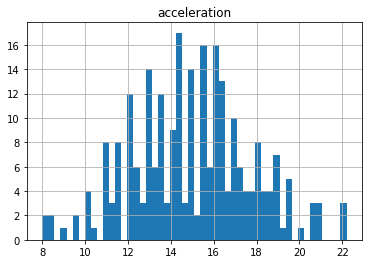

In [32]:
# USA histogram
mpg[(mpg['origin'] == 'usa')].hist(column='acceleration', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002481FC54508>]],
      dtype=object)

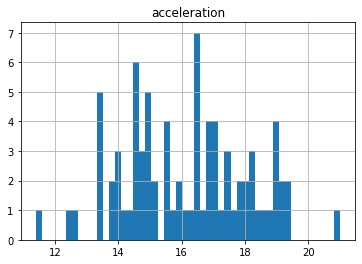

In [33]:
# Japan histogram
mpg[(mpg['origin'] == 'japan')].hist(column='acceleration', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1A73EC30>]],
      dtype=object)

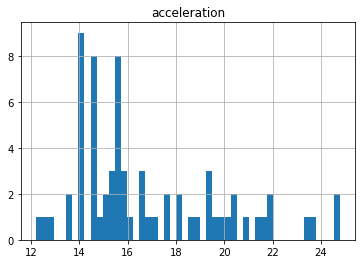

In [20]:
# Europe histogram
mpg[(mpg['origin'] == 'europe')].hist(column='acceleration', bins = 50)

## Question 13. Calculate correlation of all the factors among themselves

In [22]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


## Question 14. Which factors (cylinders, horsepower or weight) will affect your mileage the most based on correlation?

According to the correlation chart above, weight has the greatest effect on car mileage (correlation of -0.832244)

## Question 15. Does the result depend on the country? If yes, how?

In [37]:
# US data
mpg_usa.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.824524,-0.834628,-0.751570,-0.846424,0.377239,0.648641
cylinders,-0.824524,1.000000,0.933885,0.827646,0.881609,-0.563293,-0.463986
displacement,-0.834628,0.933885,1.000000,0.902744,0.917588,-0.619890,-0.497591
horsepower,-0.751570,0.827646,0.902744,1.000000,0.838450,-0.719191,-0.495009
weight,-0.846424,0.881609,0.917588,0.838450,1.000000,-0.440230,-0.406388
acceleration,0.377239,-0.563293,-0.619890,-0.719191,-0.440230,1.000000,0.380878
model_year,0.648641,-0.463986,-0.497591,-0.495009,-0.406388,0.380878,1.000000


In [38]:
# Japan data
mpg_jpn.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.139788,-0.366020,-0.673095,-0.564106,0.401114,0.568662
cylinders,-0.139788,1.000000,0.720992,0.431770,0.489184,-0.219675,0.085985
displacement,-0.366020,0.720992,1.000000,0.730176,0.841430,-0.535590,0.120835
horsepower,-0.673095,0.431770,0.730176,1.000000,0.867589,-0.720149,-0.215264
weight,-0.564106,0.489184,0.841430,0.867589,1.000000,-0.567682,0.045365
acceleration,0.401114,-0.219675,-0.535590,-0.720149,-0.567682,1.000000,-0.000944
model_year,0.568662,0.085985,0.120835,-0.215264,0.045365,-0.000944,1.000000


In [39]:
# Europe data
mpg_eur.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.271719,-0.495594,-0.679575,-0.512011,0.298047,0.504231
cylinders,-0.271719,1.000000,0.657791,0.392653,0.574767,0.024453,0.262851
displacement,-0.495594,0.657791,1.000000,0.622043,0.891560,0.038032,0.206940
horsepower,-0.679575,0.392653,0.622043,1.000000,0.611619,-0.544388,-0.132330
weight,-0.512011,0.574767,0.891560,0.611619,1.000000,0.166325,0.178178
acceleration,0.298047,0.024453,0.038032,-0.544388,0.166325,1.000000,0.175077
model_year,0.504231,0.262851,0.206940,-0.132330,0.178178,0.175077,1.000000


Yes, when the data is filtered by origin, the above information gives us the following

#### USA
Strongest correlation: *Weight* at *-0.846424* 

#### Japan
Strongest correlation: *Horsepower* at *-0.673095*

#### Europe
Strongest correlation: *Horsepower* at *-0.679575*